# **Spit some [tensor] flow**

Practice makes perfect

`Let's get this over with`


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)

2.2.0


## Generative Adversarial Networks 

GANs are one of the most interesting applications of deep learning. They work in pairs; they have two sub-networks working against each other. A generative network generates fake data to fool the discriminating network. E.g., a generative network makes faces, and the discriminating network classifies if they are real people or not. 

They are called adversarial because their subunits work against each other. Let's get into the concepts of GANs. 

What loss function would the discriminator use? It has to check if the generated data is real or fake, so we'll use binary crossentropy. 

What about the generator loss? We'll just freeze the discriminator! and use the binary crossentropy loss function with labels reversed. So the generative network fools the discriminator and we ourselves fool the generative network !


## Image ====> Discriminator ====> Real or Fake? 

## Noise ====> Generator ====> Fake Image


## Let's load the dataset using keras datasets 

In [0]:
from tensorflow.keras.layers import Input, Dense, Dropout, LeakyReLU, BatchNormalization, Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD
import os
import sys

In [24]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
X_train, X_test = X_train / 255.0 * 2 - 1 , X_test / 255.0 * 2 -1  
# SCALING BETWEEN -1 AND 1

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [0]:
N, H, W, C = X_train.shape
D = H * W * C 

In [0]:
X_train = X_train.reshape(-1, D)
X_test = X_test.reshape(-1, D)

In [27]:
print(X_train.shape)
print(X_test.shape)

(50000, 3072)
(10000, 3072)


In [0]:
# Dimensionality of the latent space
LD = 200
# Reference https://www.tensorflow.org/tutorials/generative/dcgan

In [0]:
def make_generator(LD, D):
  i_layer = Input(shape=(LD,))
  h_layer = Dense(128, activation=LeakyReLU(alpha=0.2))(i_layer)
  h_layer = BatchNormalization(momentum = 0.7)(h_layer)
  h_layer = Dense(256, activation=LeakyReLU(alpha=0.2))(h_layer)
  h_layer = BatchNormalization(momentum = 0.7)(h_layer)
  h_layer = Dense(512, activation=LeakyReLU(alpha=0.2))(h_layer)
  h_layer = BatchNormalization(momentum = 0.7)(h_layer)
  h_layer = Dense(1024, activation=LeakyReLU(alpha=0.2))(h_layer)
  h_layer = BatchNormalization(momentum = 0.7)(h_layer)
  h_layer = Dense(1024, activation=LeakyReLU(alpha=0.2))(h_layer)
  h_layer = BatchNormalization(momentum = 0.7)(h_layer)
  o_layer = Dense(D, activation='tanh')(h_layer)
  return Model(i_layer, o_layer)

In [0]:
def make_discriminator(D):
  i_layer = Input(shape=(D,))
  h_layer = Dense(512, activation=LeakyReLU(alpha=0.2))(i_layer)
  h_layer = Dense(1024, activation=LeakyReLU(alpha=0.2))(h_layer)
  o_layer = Dense(1, activation='sigmoid')(h_layer)
  return Model(i_layer, o_layer)
  

In [0]:
d = make_discriminator(D)

In [0]:
d.compile(loss='binary_crossentropy',
          optimizer = Adam(0.0001),
          metrics = ['accuracy'])

In [0]:
g = make_generator(LD, D)

In [0]:
noise_i_layer = Input(shape=(LD,))
image = g(noise_i_layer, D)
d.trainable = False
prediction = d(image)
gan = Model(noise_i_layer, prediction)

In [0]:
gan.compile(loss='binary_crossentropy',
          optimizer = Adam(0.0001))

In [0]:
batch_size = 64
epochs = 30000
export_period = 10000

In [0]:
ones = np.ones(batch_size)
zeros = np.zeros(batch_size)

In [0]:
d_loss_list = []
g_loss_list = []

In [0]:
if not os.path.exists('GANS'):
  os.makedirs('GANS')

In [0]:
def get_images(epochs, rows, columns):
  noise = np.random.randn(rows * columns, LD)
  images_by_generator = g.predict(noise)
  images_by_generator = 0.5 * images_by_generator + 0.5

  fig, ax = plt.subplots(rows, columns)
  index = 0
  for i in range(rows):
    for j in range(columns):
      ax[i,j].imshow(images_by_generator[index].reshape(H,W, C))
      ax[i,j].axis('off')
      index+=1
  fig.savefig("GANS/%d.png" % epochs)
  plt.close

epoch = 0 d_loss = 0.7045108675956726 and g_loss = 0.5390229225158691
epoch = 200 d_loss = 0.29304301738739014 and g_loss = 3.1597561836242676
epoch = 400 d_loss = 0.14772610366344452 and g_loss = 5.087121486663818
epoch = 600 d_loss = 0.17640657350420952 and g_loss = 5.937417984008789
epoch = 800 d_loss = 0.1307656466960907 and g_loss = 5.1327314376831055
epoch = 1000 d_loss = 0.17559966444969177 and g_loss = 4.512109756469727
epoch = 1200 d_loss = 0.07509341649711132 and g_loss = 5.164708137512207
epoch = 1400 d_loss = 0.06695672497153282 and g_loss = 5.347550868988037
epoch = 1600 d_loss = 0.07350252754986286 and g_loss = 6.2587890625
epoch = 1800 d_loss = 0.10259611904621124 and g_loss = 4.41020393371582
epoch = 2000 d_loss = 0.14352094382047653 and g_loss = 9.063658714294434
epoch = 2200 d_loss = 0.07275721058249474 and g_loss = 5.70087194442749
epoch = 2400 d_loss = 0.07203143648803234 and g_loss = 5.7164154052734375
epoch = 2600 d_loss = 0.15960413590073586 and g_loss = 9.274253

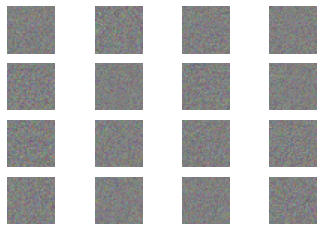

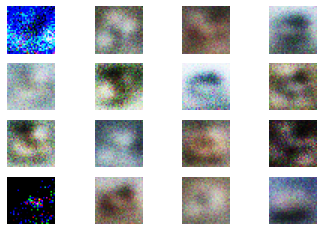

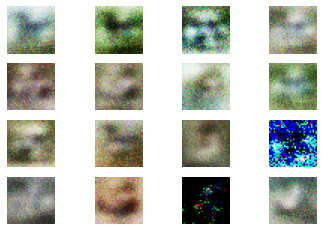

In [41]:
for e in range(epochs):
  index = np.random.randint(0, X_train.shape[0], batch_size)
  real = X_train[index]

  noise = np.random.randn(batch_size, LD)
  fake = g.predict(noise)

  d_loss_real, d_accuracy_real = d.train_on_batch(real, ones)
  d_loss_fake, d_accuracy_fake= d.train_on_batch(fake, zeros)
  d_loss = (d_loss_real + d_loss_fake) * 1/2 
  d_accuracy = (d_loss_real + d_loss_fake) * 1/2


  noise = np.random.randn(batch_size, LD)
  g_loss = gan.train_on_batch(noise, ones)

  d_loss_list.append(d_loss)
  g_loss_list.append(g_loss)

  if e % 200 == 0:
    print("epoch = {} d_loss = {} and g_loss = {}".format(e, d_loss, g_loss))
  if e % export_period == 0:
    get_images(e , 4,4)

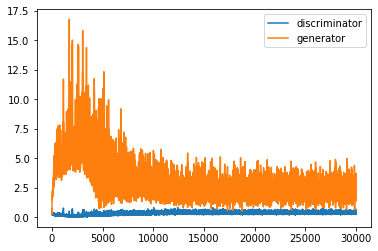

In [42]:
plt.plot(d_loss_list, label = 'discriminator')
plt.plot(g_loss_list, label = 'generator')
plt.legend()
plt.show()